# Sentiment analysis
source: https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Positive%20vs.%20Negative%20Sentiment%20Classification.html

In [1]:
import transformers
import datasets
import shap
import numpy as np

In [2]:
dataset = datasets.load_dataset("imdb", split="test")

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:20]]

Reusing dataset imdb (/Users/ryotaro.shimizu/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a)


In [3]:
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)
classifier(short_data[:2])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[[{'label': 'NEGATIVE', 'score': 0.0012035146355628967},
  {'label': 'POSITIVE', 'score': 0.9987964630126953}],
 [{'label': 'NEGATIVE', 'score': 0.0022187817376106977},
  {'label': 'POSITIVE', 'score': 0.9977812170982361}]]

In [4]:
# define the explainer
explainer = shap.Explainer(classifier)

In [5]:
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(short_data[:2])

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 3it [00:12, 12.86s/it]                                         


In [6]:
shap.plots.text(shap_values[:,:,"POSITIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [7]:
pmodel = shap.models.TransformersPipeline(classifier, rescale_to_logits=False)
pmodel(short_data[:2])

array([[0.00120351, 0.99879646],
       [0.00221878, 0.99778122]])

In [8]:
pmodel = shap.models.TransformersPipeline(classifier, rescale_to_logits=True)
pmodel(short_data[:2])

array([[-6.7213049 ,  6.72128631],
       [-6.10857575,  6.10857523]])

In [9]:
explainer2 = shap.Explainer(pmodel)
shap_values2 = explainer2(short_data[:2])
shap.plots.text(shap_values2[:,:,1])

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 3it [00:11, 11.62s/it]                                         


In [10]:
explainer2 = shap.Explainer(pmodel, classifier.tokenizer)
shap_values2 = explainer2(short_data[:2])
shap.plots.text(shap_values2[:,:,1])

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 3it [00:11, 11.85s/it]                                         


In [11]:
masker = shap.maskers.Text(classifier.tokenizer)
explainer2 = shap.Explainer(pmodel, masker)
shap_values2 = explainer2(short_data[:2])
shap.plots.text(shap_values2[:,:,1])

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 3it [00:11, 11.83s/it]                                         


In [12]:
masker.shape("I like this movie.")

(1, 7)

In [13]:
model_args = masker(np.array([True, True, True, True, True, True, True]), "I like this movie.")
model_args

(array(['I like this movie.'], dtype='<U18'),)

In [14]:
pmodel(*model_args)

array([[-8.90780447,  8.90786191]])

In [15]:
model_args = masker(np.array([True, True, False, False, True, True, True]), "I like this movie.")
model_args

(array(['I [MASK][MASK]movie.'], dtype='<U20'),)

In [16]:
pmodel(*model_args)

array([[-3.72092179,  3.72092058]])

In [17]:
masker2 = shap.maskers.Text(classifier.tokenizer, mask_token="...", collapse_mask_token=True)

In [18]:
model_args2 = masker2(np.array([True, True, False, False, True, True, True]), "I like this movie.")
model_args2

(array(['I ...movie.'], dtype='<U11'),)

In [19]:
pmodel(*model_args2)

array([[-3.20818604,  3.20818753]])

In [20]:
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(short_data[:20])

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  10%|███▌                               | 2/20 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  20%|█████▍                     | 4/20 [00:17<00:43,  2.74s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  30%|████████                   | 6/20 [00:29<01:03,  4.54s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  35%|█████████▍                 | 7/20 [00:34<01:03,  4.89s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  55%|██████████████▎           | 11/20 [00:55<00:45,  5.05s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  60%|███████████████▌          | 12/20 [01:01<00:42,  5.34s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  65%|████████████████▉         | 13/20 [01:07<00:38,  5.54s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  70%|██████████████████▏       | 14/20 [01:14<00:35,  5.97s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  75%|███████████████████▌      | 15/20 [01:20<00:29,  5.89s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  80%|████████████████████▊     | 16/20 [01:26<00:23,  5.95s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  85%|██████████████████████    | 17/20 [01:32<00:17,  5.96s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  90%|███████████████████████▍  | 18/20 [01:39<00:12,  6.43s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  95%|████████████████████████▋ | 19/20 [01:46<00:06,  6.49s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 100%|██████████████████████████| 20/20 [01:52<00:00,  6.42s/it]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 21it [01:58,  6.25s/it]                                        


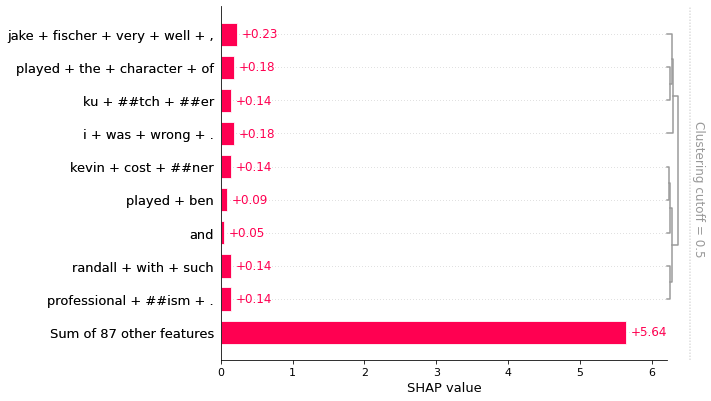

In [21]:
shap.plots.bar(shap_values[0,:,"POSITIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


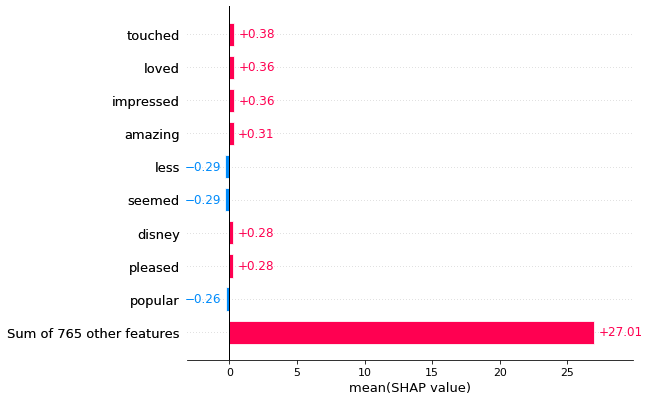

In [22]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0))

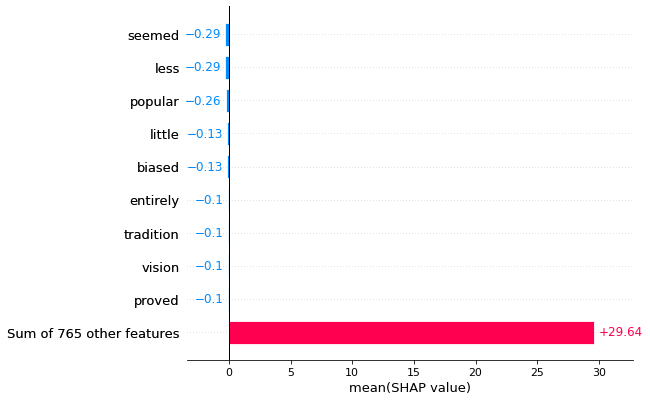

In [23]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0), order=shap.Explanation.argsort)

# Text generation
source: https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/text_generation/Open%20Ended%20Text%20Generation%20Explanation%20Demo.html

In [24]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
import shap
import torch

In [27]:
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
try:
    model =  AutoModelForCausalLM.from_pretrained("gpt2").cuda()
except:
    model =  AutoModelForCausalLM.from_pretrained("gpt2").cpu()

In [28]:
# set model decoder to true
model.config.is_decoder=True
# set text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "no_repeat_ngram_size": 2
  }

In [29]:
s = ['I enjoy walking with my cute dog']

In [30]:
explainer = shap.Explainer(model,tokenizer)

Using pad_token, but it is not set yet.


In [31]:
shap_values = explainer(s)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/42 [00:00<?, ?it/s]

In [32]:
shap.plots.text(shap_values)

In [33]:
s=['Scientists confirmed the worst possible outcome: the massive asteroid will collide with Earth']

In [34]:
explainer = shap.Explainer(model,tokenizer)

In [35]:
shap_values = explainer(s)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 2it [00:10, 10.98s/it]                                         


In [36]:
shap.plots.text(shap_values)

In [37]:
# define input
x = [
    "I know many people who are Russian.",
    "I know many people who are Greek.",
    "I know many people who are Australian.",
    "I know many people who are American.",
    "I know many people who are Italian.",
    "I know many people who are Spanish.",
    "I know many people who are German.",
    "I know many people who are Indian."
]

In [38]:
# define output
y = [
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!"
]

In [39]:
teacher_forcing_model = shap.models.TeacherForcing(model, tokenizer)
masker = shap.maskers.Text(tokenizer, mask_token = "...", collapse_mask_token=True)

In [40]:
explainer = shap.Explainer(teacher_forcing_model,masker)

In [41]:
shap_values = explainer(x, y)

Partition explainer: 9it [00:21,  4.33s/it]                                         


In [42]:
shap.plots.text(shap_values)

# Summarization
source: https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/summarization/Abstractive%20Summarization%20Explanation%20Demo.html

In [43]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
from datasets import load_dataset
import shap

In [44]:
tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-xsum-12-6")
try:
    model =  AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-xsum-12-6").cuda()
except:
    model =  AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-xsum-12-6").cpu()

In [45]:
dataset = load_dataset('xsum',split='train')

Using custom data configuration default
Reusing dataset xsum (/Users/ryotaro.shimizu/.cache/huggingface/datasets/xsum/default/1.2.0/4957825a982999fbf80bca0b342793b01b2611e021ef589fb7c6250b3577b499)


In [46]:
# slice inputs from dataset to run model inference on
s = dataset['document'][0:1]

In [47]:
explainer = shap.Explainer(model,tokenizer)

In [48]:
shap_values = explainer(s)

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 2it [02:09, 129.26s/it]                                        


In [49]:
shap.plots.text(shap_values)

In [50]:
# Define function
def f(x):
    inputs = tokenizer(x.tolist(), return_tensors="pt", padding=True).to('cuda')
    with torch.no_grad():
        out = model.generate(**inputs)
    sentence = [tokenizer.decode(g, skip_special_tokens=True) for g in out]
    return np.array(sentence)

In [51]:
teacher_forcing_model = shap.models.TeacherForcing(f, similarity_model=model, similarity_tokenizer=tokenizer)
# create a Text masker
masker = shap.maskers.Text(tokenizer, mask_token = "...", collapse_mask_token=True)

In [52]:
explainer_model_agnostic = shap.Explainer(teacher_forcing_model, masker)

In [53]:
# shap_values_model_agnostic = explainer_model_agnostic(s)

In [54]:
# shap.plots.text(shap_values_model_agnostic)

# Emotion classification

In [55]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
import transformers
import datasets
import shap

# load the emotion dataset
dataset  = datasets.load_dataset("emotion", split = "train")
data = pd.DataFrame({'text':dataset['text'],'emotion':dataset['label']})

Using custom data configuration default
Reusing dataset emotion (/Users/ryotaro.shimizu/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


In [56]:
tokenizer = transformers.AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion", use_fast=True)
try: 
    model = transformers.AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion").cuda()
except:
    model = transformers.AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion").cpu()

# build a pipeline object to do predictions
pred = transformers.pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

In [57]:
explainer = shap.Explainer(pred)

In [58]:
shap_values = explainer(data['text'][:3])

In [59]:
shap.plots.text(shap_values)

In [60]:
shap.plots.text(shap_values[:, :, "anger"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


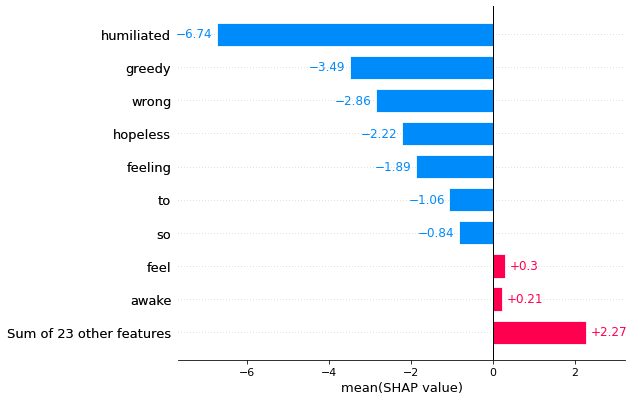

In [61]:
shap.plots.bar(shap_values[:,:,"joy"].mean(0))

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


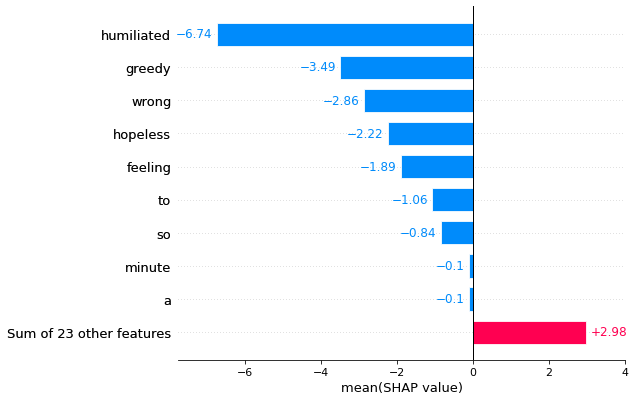

In [62]:
# we can sort the bar chart in decending order
shap.plots.bar(shap_values[:,:,"joy"].mean(0), order=shap.Explanation.argsort)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


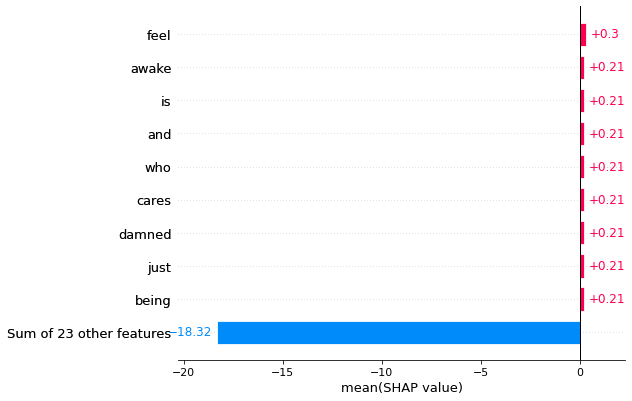

In [63]:
# ...or acending order
shap.plots.bar(shap_values[:,:,"joy"].mean(0), order=shap.Explanation.argsort.flip)

In [64]:
logit_explainer = shap.Explainer(shap.models.TransformersPipeline(pred, rescale_to_logits=True))

logit_shap_values = logit_explainer(data['text'][:3])
shap.plots.text(logit_shap_values)

# Translation
source: https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/translation/Machine%20Translation%20Explanation%20Demo.html

In [65]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import shap
import torch

In [66]:
# load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")
try:
    model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-es").cuda()
except:
    model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-es").cpu()

# define the input sentences we want to translate
data = [
    "Transformers have rapidly become the model of choice for NLP problems, replacing older recurrent neural network models"
]

In [67]:
# we build an explainer by passing the model we want to explain and
# the tokenizer we want to use to break up the input strings
explainer = shap.Explainer(model, tokenizer)

In [68]:
# explainers are callable, just like models
shap_values = explainer(data, fixed_context=1)

In [69]:
shap.plots.text(shap_values)

In [70]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
try:
    model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-fr").cuda()
except:
    model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-fr").cpu()

In [71]:
explainer = shap.Explainer(model,tokenizer)

In [72]:
shap_values = explainer(data)

In [73]:
shap.plots.text(shap_values)